In [20]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import copy

In [21]:
G = nx.barabasi_albert_graph(2000, 3)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [22]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1392
Number of deinfluenced nodes: 0
Number of susceptible nodes: 608
influencer {256, 1281, 129, 773, 1273, 1928, 267, 655, 400, 1938, 663, 671, 1951, 673, 415, 1443, 1188, 551, 1191, 810, 1710, 1458, 1589, 1078, 1720, 314, 1083, 318, 837, 583, 1223, 849, 1489, 471, 1496, 1624, 729, 1112, 1883, 733, 1503, 1637, 1512, 1896, 750, 1908, 1656, 1657, 1534, 895}


In [23]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': {1118}, 'Degree': set()}), (3, {'Random': {491}, 'Degree': set()}), (4, {'Random': {625}, 'Degree': set()}), (5, {'Random': {913, 859}, 'Degree': set()}), (6, {'Random': {1450, 54}, 'Degree': set()}), (7, {'Random': {464, 83, 1983}, 'Degree': set()}), (8, {'Random': {880, 1717, 1229, 1871}, 'Degree': set()}), (9, {'Random': {272, 544, 547, 1357}, 'Degree': set()}), (10, {'Random': {224, 137, 1547, 1063}, 'Degree': {5}}), (11, {'Random': {1089, 785, 66}, 'Degree': {5}}), (12, {'Random': {1395, 1362, 115, 723}, 'Degree': {5}}), (13, {'Random': {418, 1925, 262, 660, 951}, 'Degree': {5}}), (14, {'Random': {992, 683, 910, 765, 1214, 1503}, 'Degree': {5}}), (15, {'Random': {620, 144, 1812, 471, 538, 446}, 'Degree': {5}}), (16, {'Random': {1123, 137, 1385, 1324, 1519, 463, 1621, 1503}, 'Degree': {5}}), (17, {'Random': {1475, 515, 874, 1612, 946, 1684, 923, 1086}, 'Degree': {5}}), (18, {'Random': {101, 647, 904, 1289, 821, 504}, 'Degree'

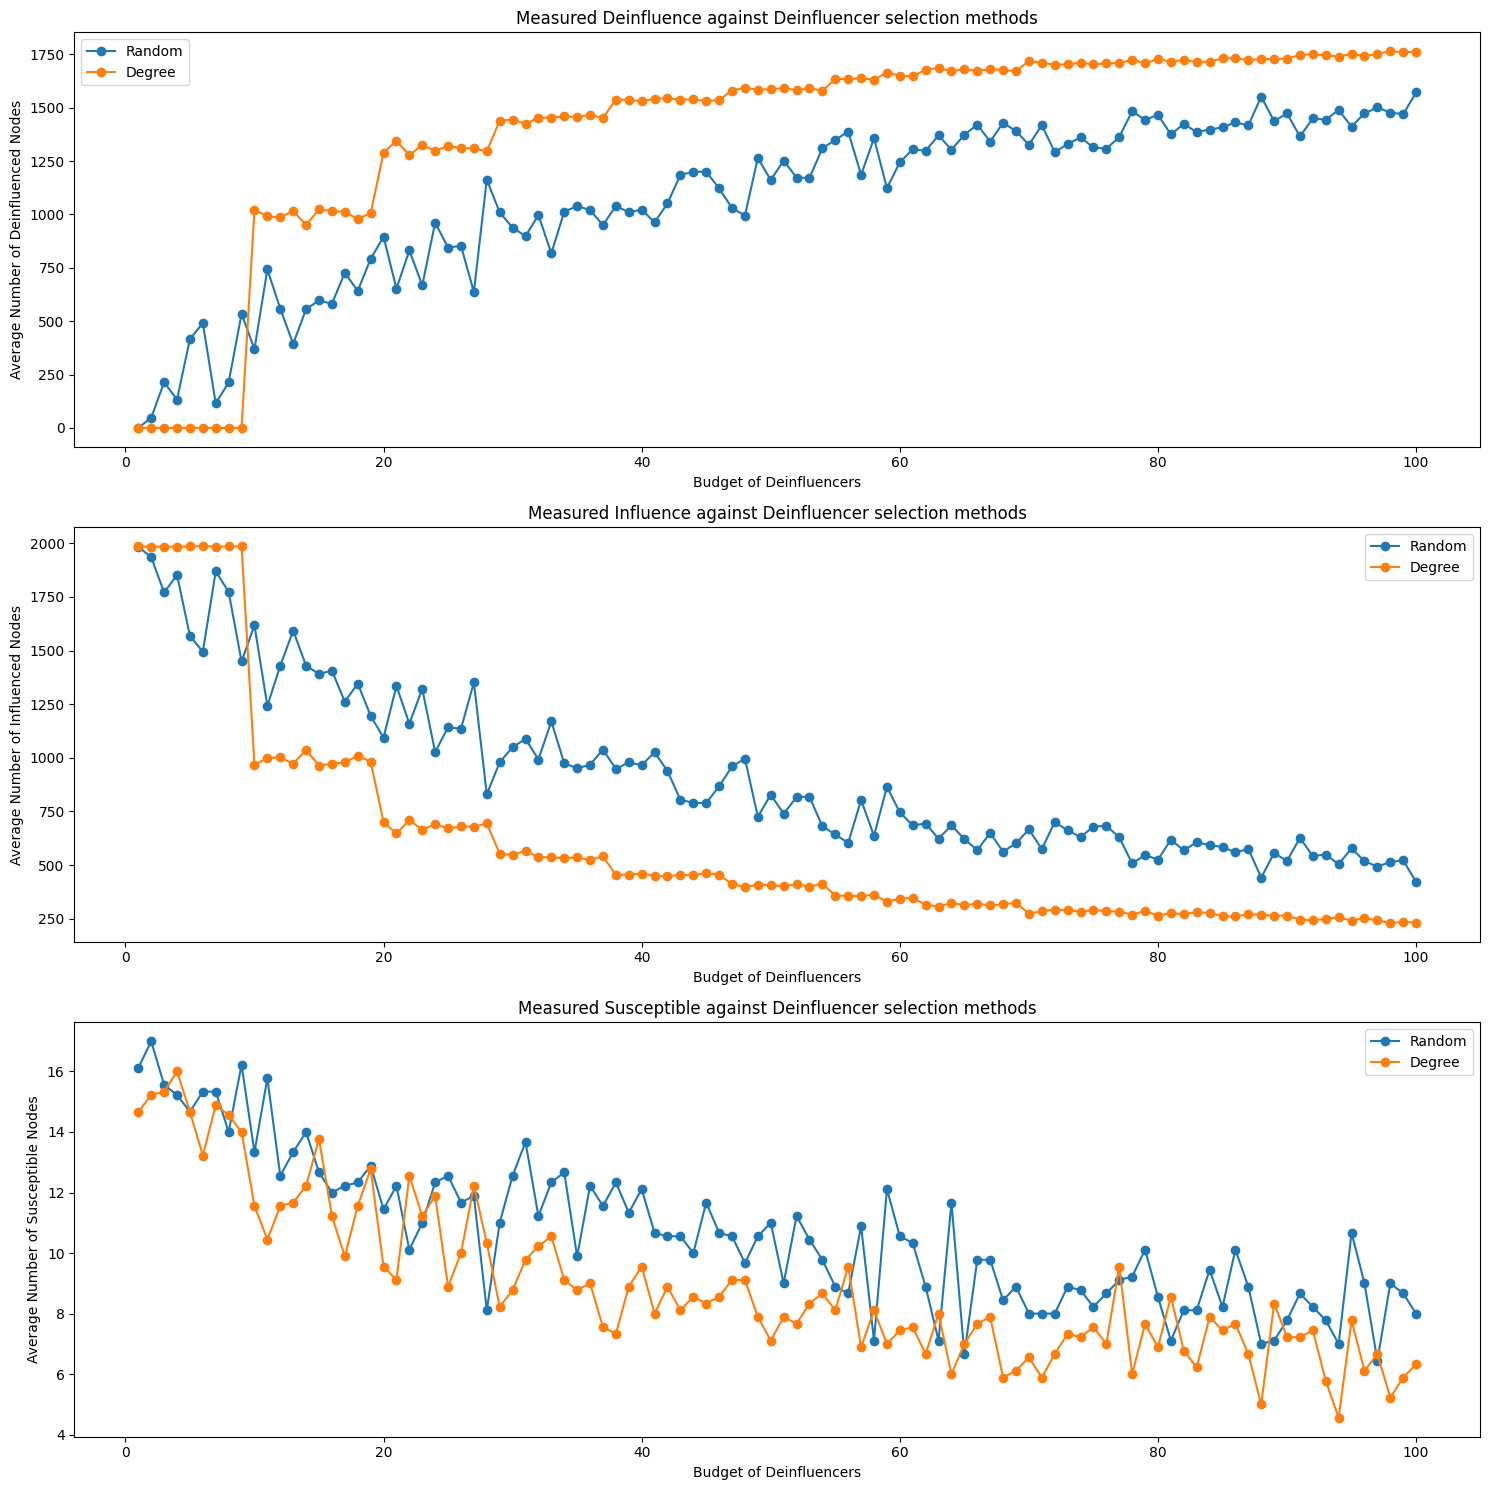

In [24]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [25]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'Degree': set()}), (2, {'Random': set(), 'Degree': set()}), (3, {'Random': set(), 'Degree': set()}), (4, {'Random': {1397}, 'Degree': set()}), (5, {'Random': {1463}, 'Degree': set()}), (6, {'Random': {1699}, 'Degree': set()}), (7, {'Random': {1321, 556}, 'Degree': set()}), (8, {'Random': {1866}, 'Degree': set()}), (9, {'Random': {736, 1957}, 'Degree': set()}), (10, {'Random': {1106, 1475, 1813}, 'Degree': set()}), (11, {'Random': {1737}, 'Degree': set()}), (12, {'Random': {908, 911}, 'Degree': set()}), (13, {'Random': set(), 'Degree': set()}), (14, {'Random': {1567, 711}, 'Degree': set()}), (15, {'Random': {196, 1390}, 'Degree': set()}), (16, {'Random': {1801, 586, 719}, 'Degree': set()}), (17, {'Random': {1072, 1475, 443}, 'Degree': set()}), (18, {'Random': {1760, 155}, 'Degree': set()}), (19, {'Random': {1040, 506}, 'Degree': set()}), (20, {'Random': {608, 556, 734}, 'Degree': set()}), (21, {'Random': set(), 'Degree': set()}), (22, {'Random': {1800, 1237, 762, 

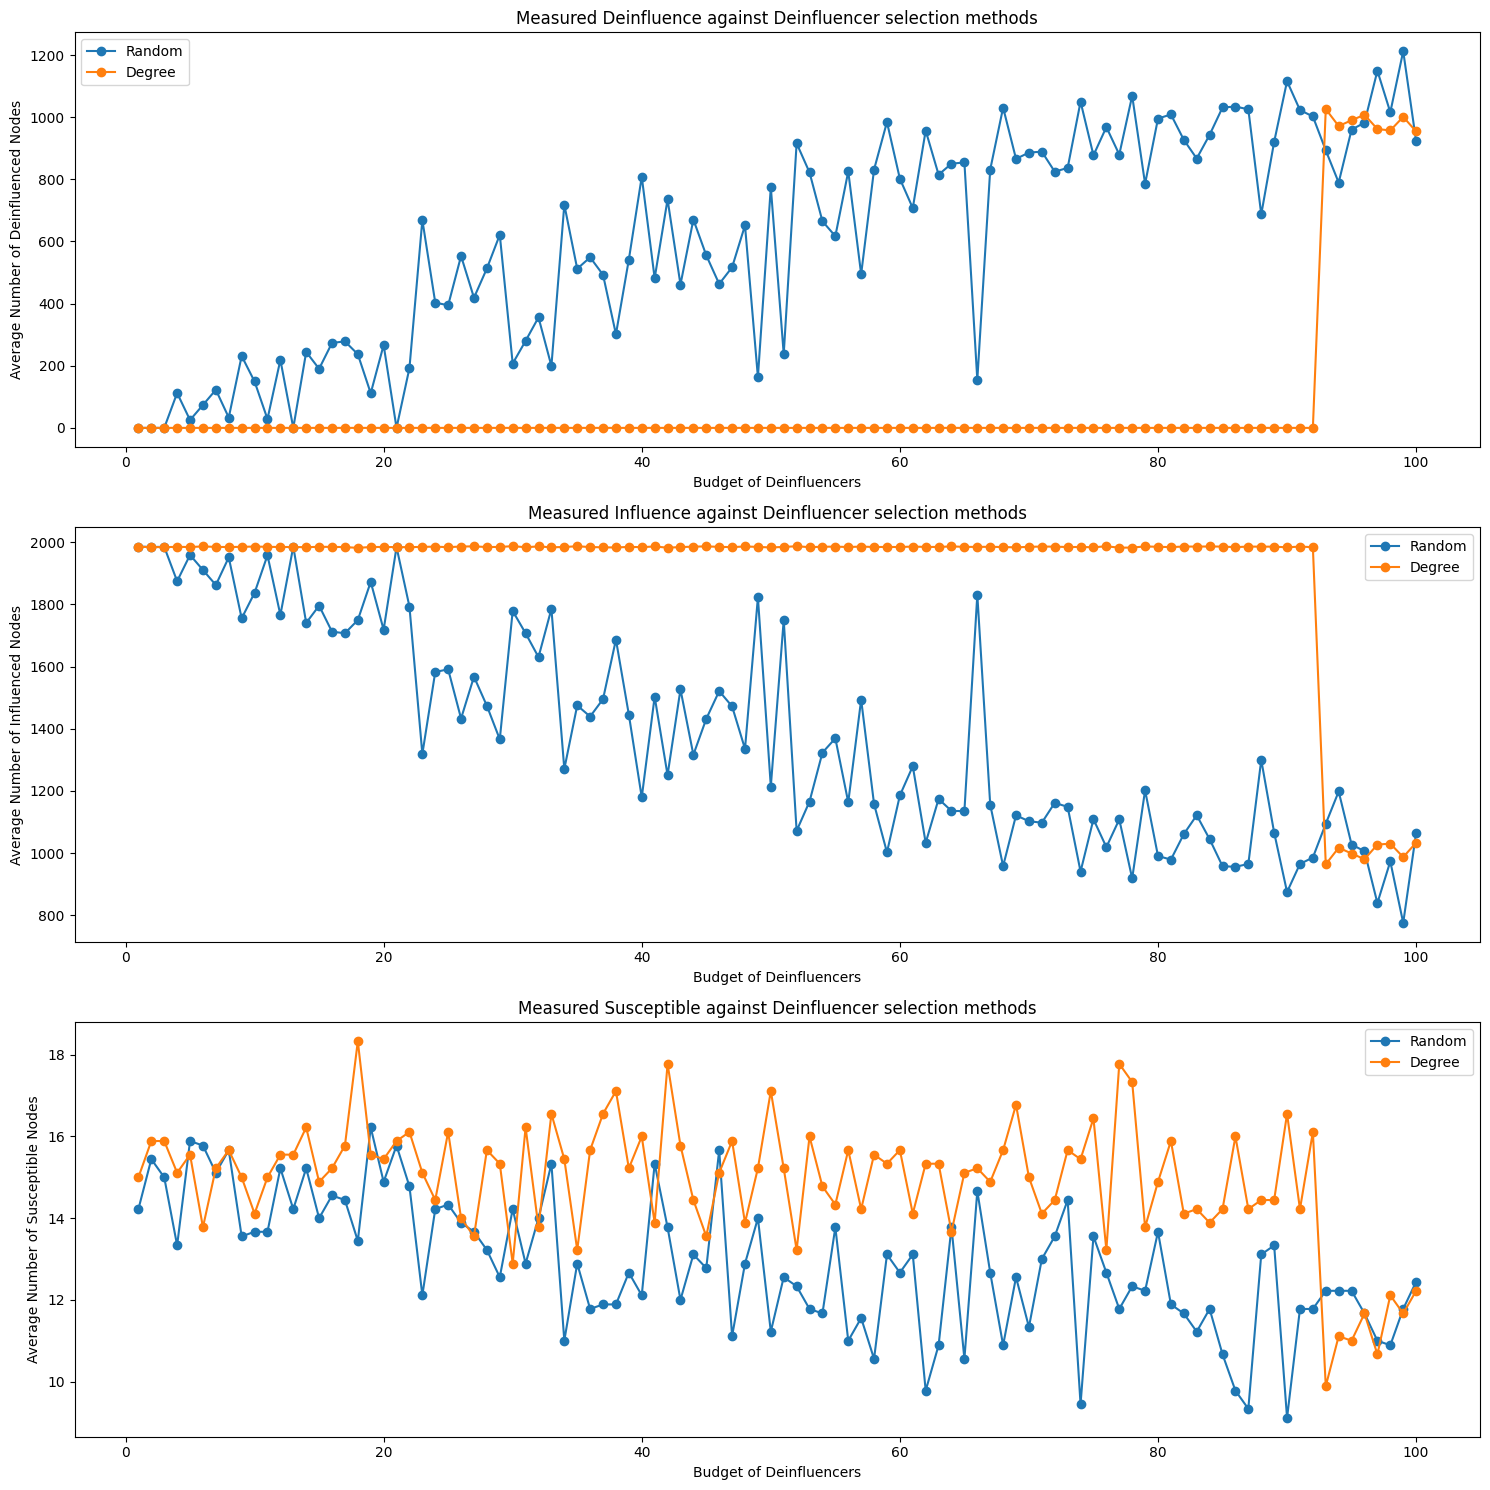

In [26]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [27]:
# Run simulation for different values of k
budget_list = list(range(0, 301, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': set(), 'Degree': set()}), (10, {'Random': {557}, 'Degree': set()}), (15, {'Random': {584, 322}, 'Degree': set()}), (20, {'Random': {281, 1212, 455}, 'Degree': set()}), (25, {'Random': {1139, 1390}, 'Degree': set()}), (30, {'Random': {28, 1774}, 'Degree': set()}), (35, {'Random': {520, 716, 1366, 247, 1341, 1566}, 'Degree': set()}), (40, {'Random': {293, 295, 746, 1131, 977, 1812, 1177, 1471}, 'Degree': set()}), (45, {'Random': {1824, 1505, 192, 1285, 1321, 1131, 587, 784, 1270, 1374}, 'Degree': set()}), (50, {'Random': {28}, 'Degree': set()}), (55, {'Random': {161, 997, 1259, 1582, 495, 1554, 21, 1341, 1374}, 'Degree': set()}), (60, {'Random': {1920, 193, 999, 1512, 1611, 1783, 942, 655, 1712, 1040, 1719, 1592, 1626, 1052, 1630}, 'Degree': set()}), (65, {'Random': {807, 1673, 1004, 1581, 812, 176, 1009, 694, 1431, 1337, 1244, 189, 254}, 'Degree': set()}), (70, {'Random': {1891, 229, 903, 904, 425, 1452, 1357, 77, 1107, 1303, 1243

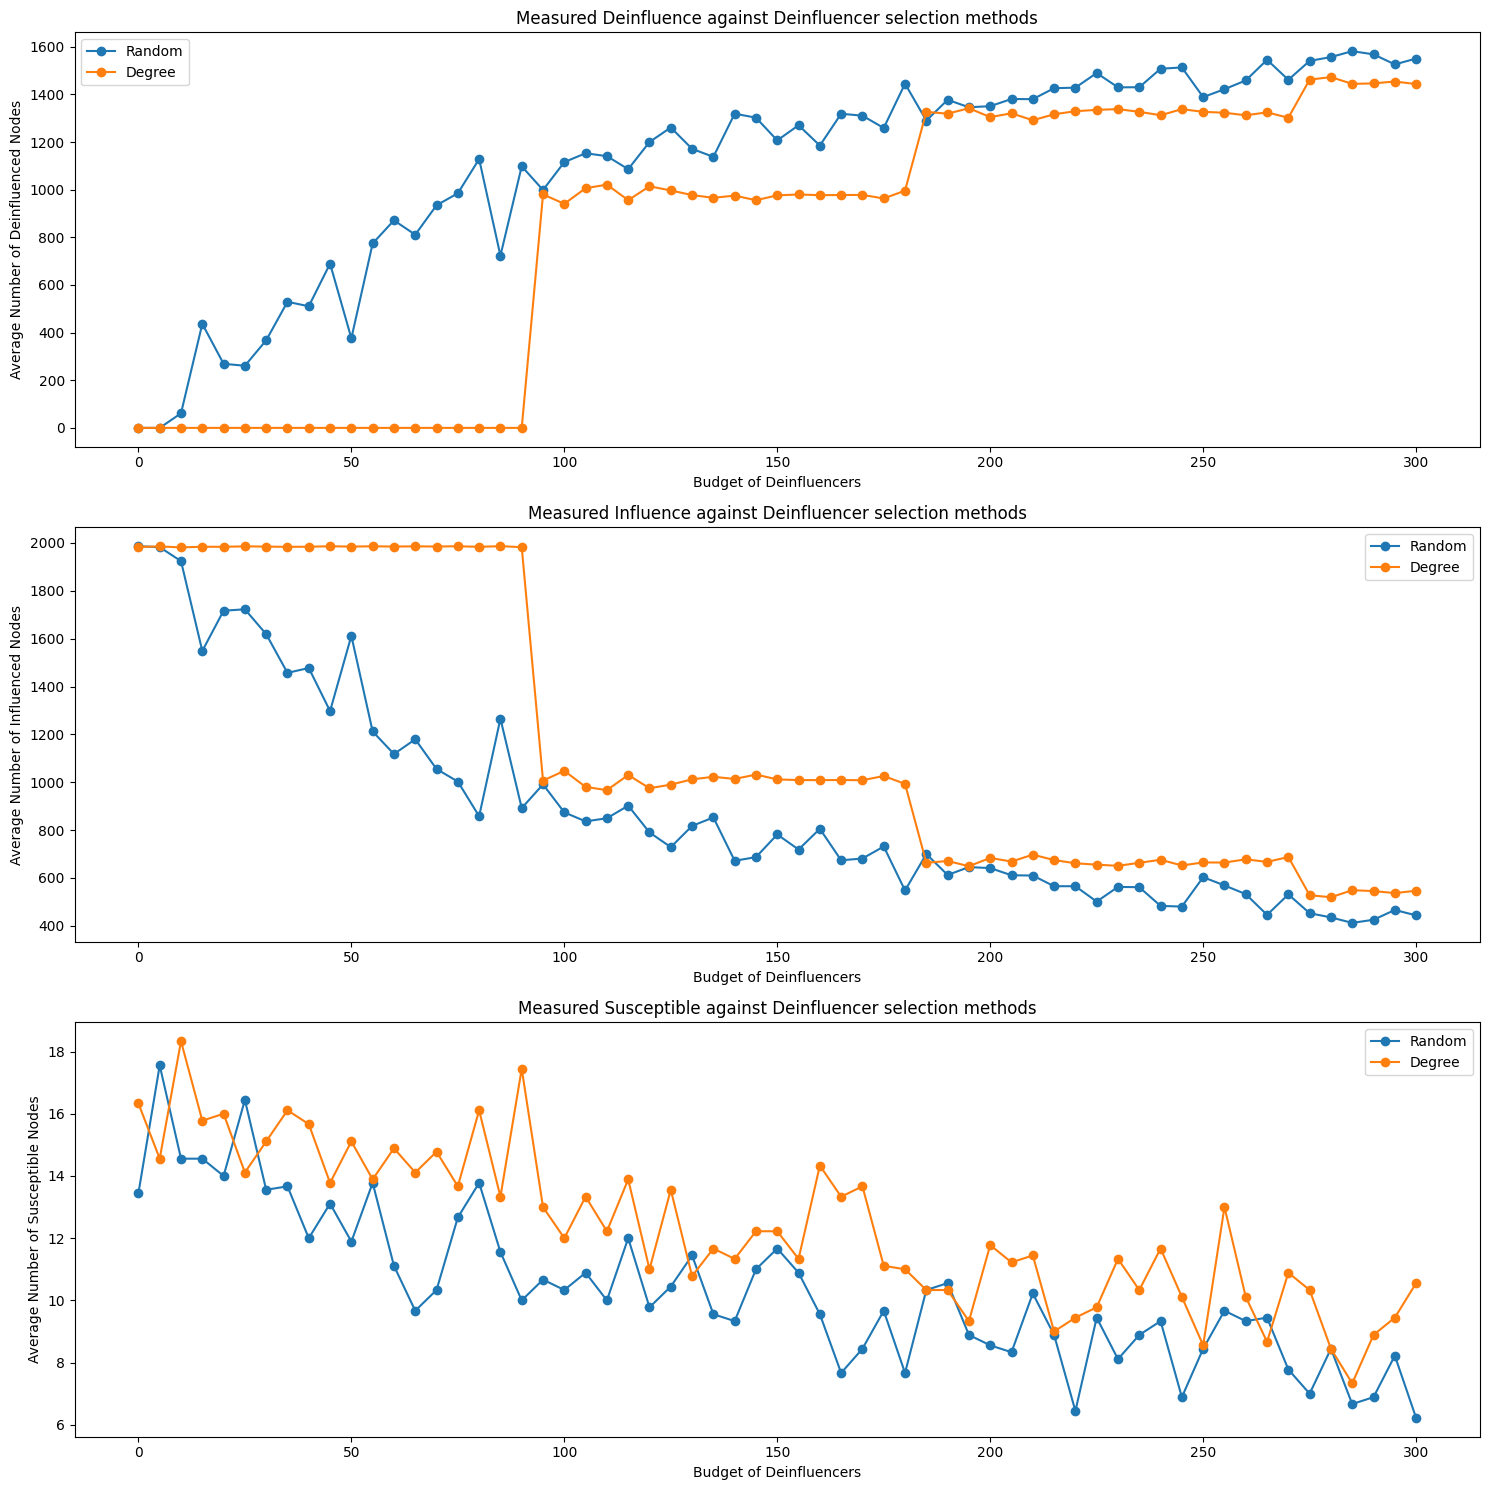

In [28]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()